# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('training.csv')
## read the file
data.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,low,vhigh,5more,more,small,low,unacc
1,high,high,2,2,big,med,unacc
2,low,vhigh,3,2,med,med,unacc
3,vhigh,low,5more,2,big,med,unacc
4,vhigh,vhigh,4,2,big,med,unacc


In [3]:
data.info()
## Get info of dataset and check for null values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1330 non-null   object
 1   maint       1330 non-null   object
 2   doors       1330 non-null   object
 3   persons     1330 non-null   object
 4   lug_boot    1330 non-null   object
 5   safety      1330 non-null   object
 6   evaluation  1330 non-null   object
dtypes: object(7)
memory usage: 72.9+ KB


In [4]:
## As all the columns are categorical, check for unique values of each column
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

['low' 'high' 'vhigh' 'med'] 	 4
['vhigh' 'high' 'low' 'med'] 	 4
['5more' '2' '3' '4'] 	 4
['more' '2' '4'] 	 3
['small' 'big' 'med'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'good'] 	 3


In [5]:
## Check how these unique categories are distributed among the columns
for i in data.columns:
    print(data[i].value_counts())
    print()

high     350
vhigh    340
low      320
med      320
Name: buying, dtype: int64

high     342
vhigh    341
low      328
med      319
Name: maint, dtype: int64

3        346
2        338
4        325
5more    321
Name: doors, dtype: int64

2       453
more    441
4       436
Name: persons, dtype: int64

med      456
small    450
big      424
Name: lug_boot, dtype: int64

low     463
med     458
high    409
Name: safety, dtype: int64

unacc    968
acc      307
good      55
Name: evaluation, dtype: int64



G:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='evaluation', ylabel='count'>

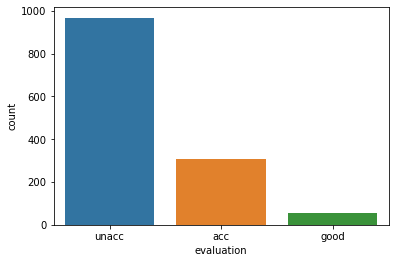

In [6]:
## show the distribution of the data in 'evaluation'
sns.countplot(data['evaluation'])

G:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

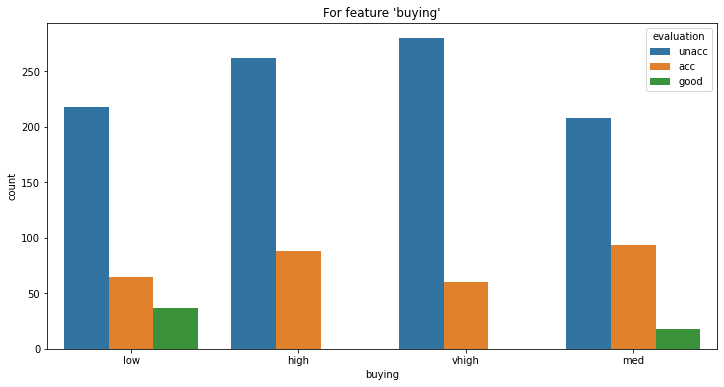

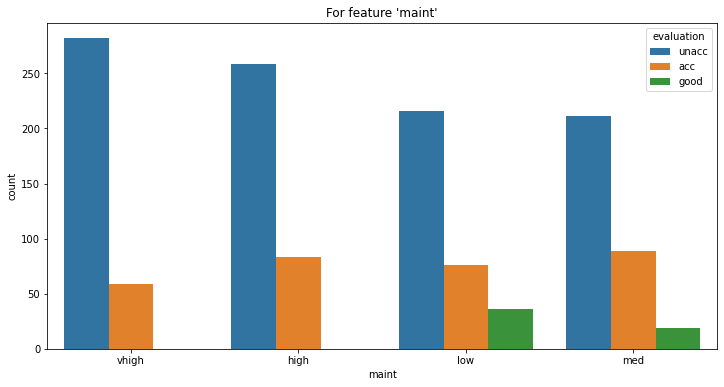

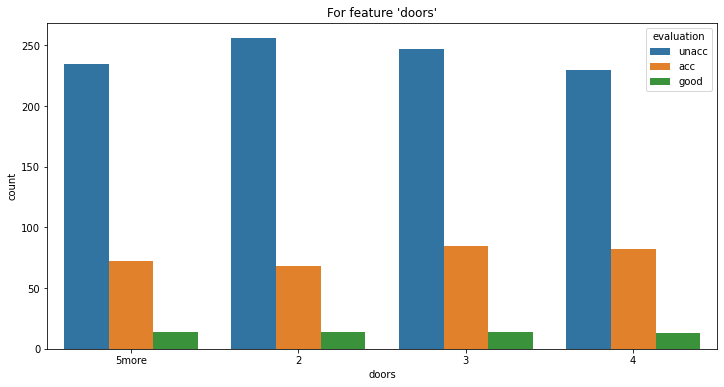

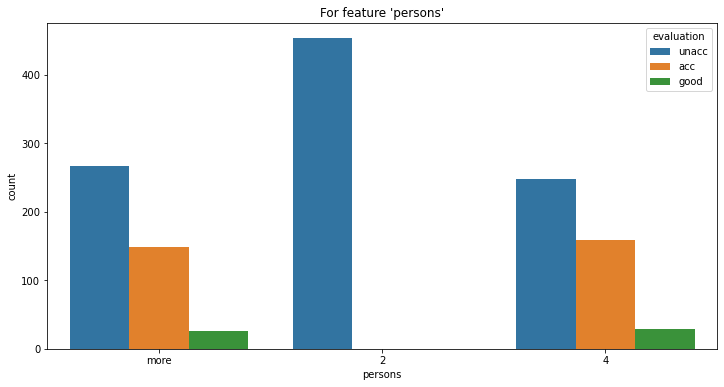

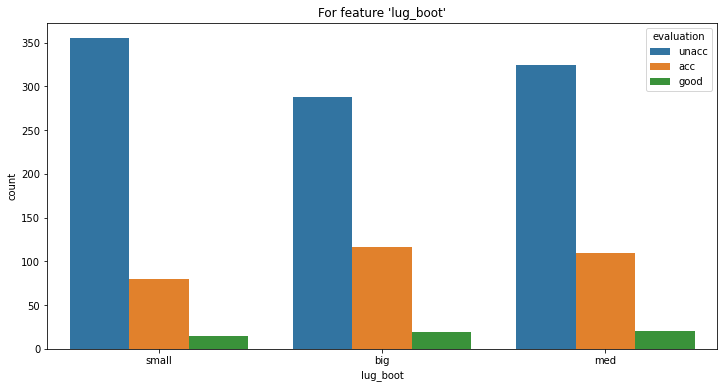

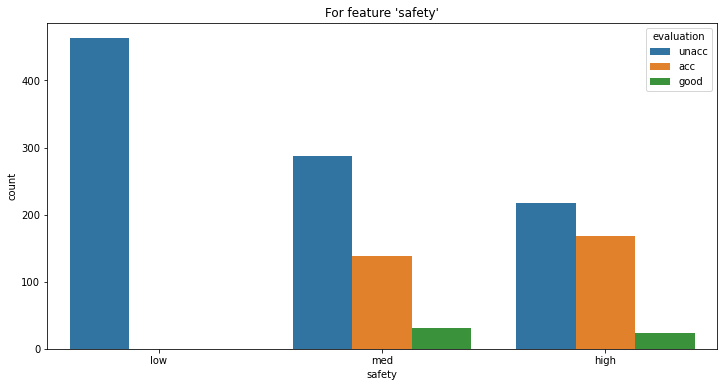

In [7]:
## show the distribution of the other data
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['evaluation'])

In [8]:
## converted string categories to integers
le=LabelEncoder()

for i in data.columns:
    data[i]=le.fit_transform(data[i])

data.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,1,3,3,2,2,1,2
1,0,0,0,0,0,2,2
2,1,3,1,0,1,2,2
3,3,1,3,0,0,2,2
4,3,3,2,0,0,2,2


<AxesSubplot:>

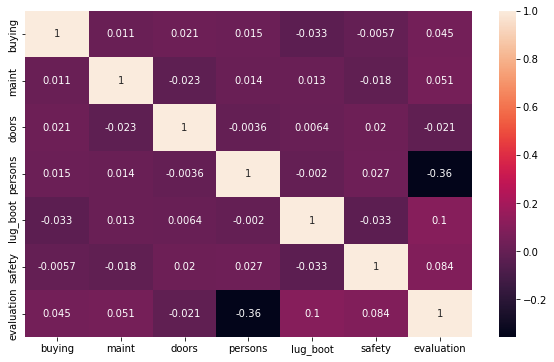

In [9]:
## using hearmap to show the correlation coefficient by columns
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [10]:
## X is the dataframe containing input data / features
X=data[data.columns[:-1]]

## y is the series which has results which are to be predicted.
y=data['evaluation']

In [11]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,1,3,3,2,2,1
1,0,0,0,0,0,2


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
## Divide data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear SVC

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [15]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred5 = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
print('ACCURACY:{:.2f}%'.format(acc_linear_svc))


ACCURACY:74.69%


G:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:
test_data = pd.read_csv('test.csv')

test_data = pd.DataFrame(test_data)

le=LabelEncoder()

for i in test_data.columns:
    test_data[i]=le.fit_transform(test_data[i])


result = test_data

result = result.values.tolist()

r = []
for i in result:
    if linear_svc.predict([i]) == [2]:
        r.append('unacc')
    elif linear_svc.predict([i]) == [0]:
        r.append('acc')
    else:
        r.append('good')

r= pd.DataFrame(r)

In [17]:
result = pd.read_csv('test.csv')

result = pd.DataFrame(result)

result['evaluation'] = r

result

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,low,med,4,2,big,low,unacc
1,vhigh,med,2,2,med,high,unacc
2,vhigh,high,4,4,big,high,unacc
3,high,vhigh,4,2,small,med,unacc
4,vhigh,high,5more,2,small,high,unacc
...,...,...,...,...,...,...,...
328,high,low,2,more,big,low,acc
329,high,med,4,2,big,low,unacc
330,high,med,4,4,big,high,unacc
331,high,med,2,4,med,low,unacc
